Compare the emission line data from GAMA to the emission line data from SDSS DR7 

In [108]:
import os
import h5py
import subprocess
import numpy as np 

from astropy.io import fits
from pydl.pydlutils.spheregroup import spherematch

from feasibgs import util as UT
from feasibgs import catalogs as Cat

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as pl 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

Read in GAMA-Legacy Catalog

In [3]:
# read in GAMA-Legacy catalog
cata = Cat.GamaLegacy()
gleg = cata.Read()
cataid = gleg['gama-photo']['cataid'] # GAMA catalog id of each object
ngal = len(cataid)

Read in SDSS spAll-line file, which contains emission line data of SDSS

In [5]:
f_sdss = h5py.File(''.join([UT.dat_dir(), 'sdss/spAll-v5_7_0.zcut.hdf5']), 'r') 
ra_sdss = f_sdss['ra'].value
dec_sdss = f_sdss['dec'].value 

In [8]:
f_sdss_emline = h5py.File(''.join([UT.dat_dir(), 'sdss/spAllLine-v5_7_0.zcut.hdf5']), 'r')
print f_sdss_emline.keys()

[u'fiberid', u'linearea', u'linearea_err', u'linechi2', u'linecontlevel', u'linecontlevel_err', u'linedof', u'lineew', u'lineew_err', u'linename', u'linenpixleft', u'linenpixright', u'linesigma', u'linesigma_err', u'linewave', u'linez', u'linez_err', u'mjd', u'plate']


In [17]:
sdss_linearea = f_sdss_emline['linearea'].value
sdss_linesigma = f_sdss_emline['linesigma'].value

In [44]:
sdss_linewave = f_sdss_emline['linewave'].value[:,0]

emission lines in the SDSS data

In [15]:
for i in range(f_sdss_emline['linename'].value.shape[1]): 
    print('%i -- %s' % (i, f_sdss_emline['linename'].value[0,i]))

0 -- Ly_alpha     
1 -- N_V 1240     
2 -- C_IV 1549    
3 -- He_II 1640   
4 -- C_III] 1908  
5 -- Mg_II 2799   
6 -- [O_II] 3725  
7 -- [O_II] 3727  
8 -- [Ne_III] 3868
9 -- H_epsilon    
10 -- [Ne_III] 3970
11 -- H_delta      
12 -- H_gamma      
13 -- [O_III] 4363 
14 -- He_II 4685   
15 -- H_beta       
16 -- [O_III] 4959 
17 -- [O_III] 5007 
18 -- He_II 5411   
19 -- [O_I] 5577   
20 -- [N_II] 5755  
21 -- He_I 5876    
22 -- [O_I] 6300   
23 -- [S_III] 6312 
24 -- [O_I] 6363   
25 -- [N_II] 6548  
26 -- H_alpha      
27 -- [N_II] 6583  
28 -- [S_II] 6716  
29 -- [S_II] 6730  
30 -- [Ar_III] 7135


spherematch the galaxies

In [10]:
m_sdss, m_gleg, d_match = spherematch(ra_sdss, dec_sdss, 
                                      gleg['gama-photo']['ra'], gleg['gama-photo']['dec'], 0.000277778)

In [11]:
print('%i matching galaxies' % len(m_sdss))

899 matching galaxies


In [12]:
for i_sdss, i_gleg in zip(m_sdss, m_gleg): 
    print('GLEG: %f, %f' % (gleg['gama-photo']['ra'][i_gleg], gleg['gama-photo']['dec'][i_gleg]))
    print('SDSS: %f, %f' % (ra_sdss[i_sdss], dec_sdss[i_sdss]))

GLEG: 133.736513, -0.239364
SDSS: 133.736513, -0.239364
GLEG: 130.767325, 0.497759
SDSS: 130.767325, 0.497759
GLEG: 136.967314, -0.374159
SDSS: 136.967314, -0.374159
GLEG: 220.689306, 1.438308
SDSS: 220.689306, 1.438309
GLEG: 175.818610, 1.940220
SDSS: 175.818609, 1.940220
GLEG: 180.797925, 1.718543
SDSS: 180.797925, 1.718543
GLEG: 214.166370, -1.262565
SDSS: 214.166369, -1.262566
GLEG: 184.174261, 1.647136
SDSS: 184.174260, 1.647136
GLEG: 184.088892, -1.726891
SDSS: 184.088893, -1.726890
GLEG: 219.755253, -0.167705
SDSS: 219.755253, -0.167706
GLEG: 218.766086, 1.397048
SDSS: 218.766086, 1.397049
GLEG: 216.139466, 1.853137
SDSS: 216.139465, 1.853137
GLEG: 129.651192, 2.807881
SDSS: 129.651193, 2.807881
GLEG: 184.565747, 1.363194
SDSS: 184.565747, 1.363193
GLEG: 129.711540, 0.348234
SDSS: 129.711541, 0.348233
GLEG: 133.764902, -0.319504
SDSS: 133.764901, -0.319503
GLEG: 139.470107, -0.499478
SDSS: 139.470106, -0.499477
GLEG: 132.453878, 1.576885
SDSS: 132.453879, 1.576885
GLEG: 140.9118

SDSS: 213.834107, 0.737376
GLEG: 178.885183, -0.697115
SDSS: 178.885169, -0.697121
GLEG: 222.085702, -1.132026
SDSS: 222.085706, -1.132011
GLEG: 215.722288, 0.594237
SDSS: 215.722288, 0.594253
GLEG: 221.108902, 0.311403
SDSS: 221.108918, 0.311408
GLEG: 130.115492, 0.212818
SDSS: 130.115507, 0.212818
GLEG: 177.045169, 1.445862
SDSS: 177.045167, 1.445847
GLEG: 218.962304, 0.373366
SDSS: 218.962315, 0.373377
GLEG: 135.856540, 1.204126
SDSS: 135.856529, 1.204115
GLEG: 176.051141, -1.811059
SDSS: 176.051142, -1.811043
GLEG: 174.902857, 1.528435
SDSS: 174.902841, 1.528435
GLEG: 215.728643, -0.763896
SDSS: 215.728627, -0.763897
GLEG: 133.293630, -0.152731
SDSS: 133.293638, -0.152717
GLEG: 175.416190, -0.376393
SDSS: 175.416174, -0.376398
GLEG: 175.875726, -0.471811
SDSS: 175.875734, -0.471825
GLEG: 130.567126, 1.225979
SDSS: 130.567114, 1.225989
GLEG: 215.718128, 0.517430
SDSS: 215.718127, 0.517446
GLEG: 213.590750, -1.081137
SDSS: 213.590754, -1.081121
GLEG: 219.925775, -1.274242
SDSS: 219.9

In [121]:
emline_sdss_index = [6, 7, 15, 16, 17, 25, 26, 27, 28, 29]
emline_gleg_key = ['oiib', 'oiir', 'hb', 'oiiib', 'oiiir', 'niib', 'ha', 'niir', 'siib', 'siir']
emline_lambda = [3726., 3728., 4861., 4959., 5007., 6548., 6563., 6584., 6716., 6731.]

In [241]:
def emlineComparison(k, integrated=False): 
    fig = plt.figure(figsize=(8,4))
    sub1 = fig.add_subplot(111)
    
    # GAMA emission line properties
    if not integrated: 
        gama_emline_integ = gleg['gama-spec'][k][m_gleg].flatten()
    else: 
        gama_emline_integ = gleg['gama-spec']['i'+k][m_gleg].flatten()        
    gama_emline_sigma = gleg['gama-spec'][k+'sig'][m_gleg].flatten()
    
    # SDSS emission line properties
    i_em = emline_gleg_key.index(k)
    sdss_emline_integ = sdss_linearea[m_sdss,emline_sdss_index[i_em]]
    sdss_emline_sigma = sdss_linewave[emline_sdss_index[i_em]] * sdss_linesigma[m_sdss,emline_sdss_index[i_em]]/(299792.- sdss_linesigma[m_sdss,emline_sdss_index[i_em]])
    #sdss_linesigma[m_sdss,emline_sdss_index[i_em]]
        
    has_gamaem = (gama_emline_integ != -99.)
    has_sdssem = (sdss_emline_integ > 0.)
    
    has_em = has_gamaem & has_sdssem 
    print np.mean(gama_emline_integ[has_em]/sdss_emline_integ[has_em])
    sub1.scatter(gama_emline_integ[has_em], sdss_emline_integ[has_em], s=2)
    sub1.plot([-100., 1000.], [-100., 1000.], c='k', ls='--')
    sub1.set_xlabel('GAMA '+k.upper()+' line flux')
    sub1.set_ylabel('SDSS '+k.upper()+' line flux')
    sub1.set_xlim([-10., 100.])
    sub1.set_ylim([-10., 100.])
    #sub2 = fig.add_subplot(122)    
    #sub2.scatter(gama_emline_sigma[has_em], sdss_emline_sigma[has_em], s=2)
    #sub2.plot([0., 2000.], [0., 2000.], c='k', ls='--')
    #sub2.set_xlabel('GAMA '+k.upper()+' $\sigma$')
    #sub2.set_ylabel('SDSS '+k.upper()+' $\sigma$')
    #sub2.set_xlim([0., 15])
    #sub2.set_ylim([0., 15])
    plt.show()

9.681192


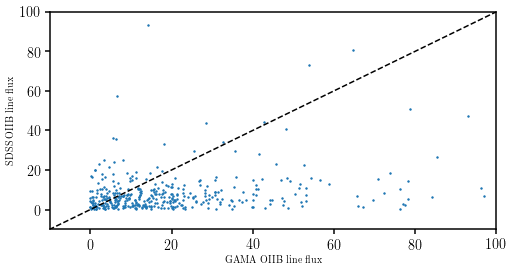

In [243]:
emlineComparison('oiib')#, integrated=True)

5.146036


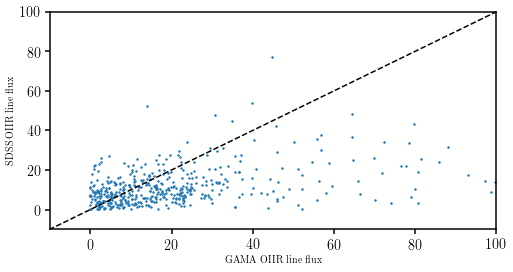

In [99]:
emlineComparison('oiir')

7.161714


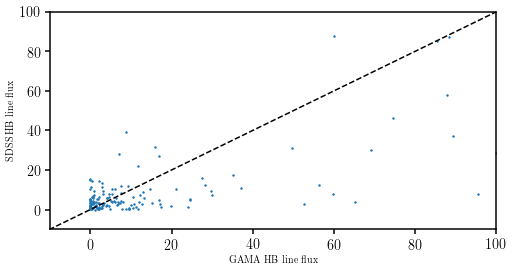

-17.27679


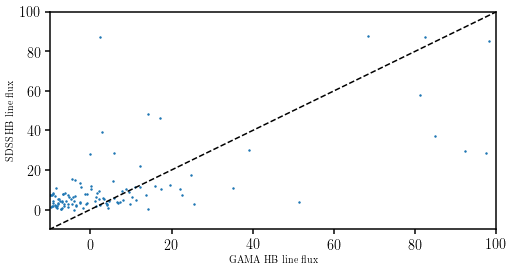

In [244]:
emlineComparison('hb')
emlineComparison('hb', integrated=True)

52.635315


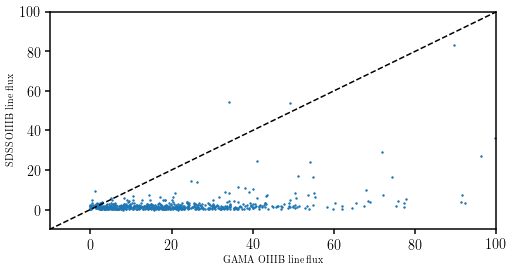

20.817379


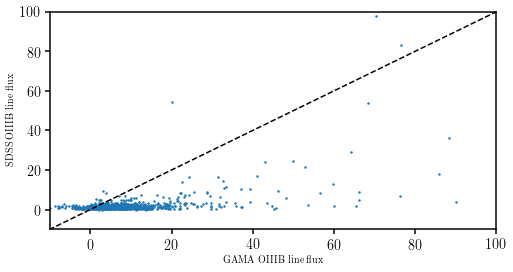

In [245]:
emlineComparison('oiiib')
emlineComparison('oiiib', integrated=True)

14.360282


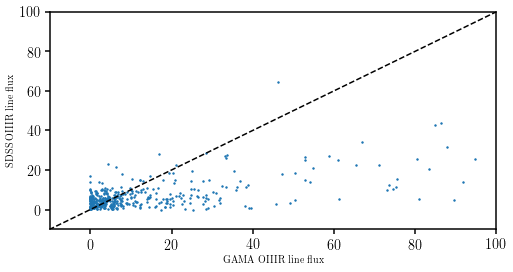

-2.3548841


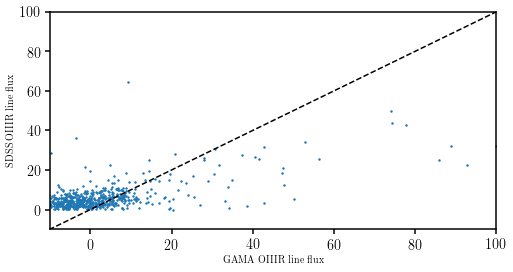

In [246]:
emlineComparison('oiiir')
emlineComparison('oiiir', integrated=True)

11.82751


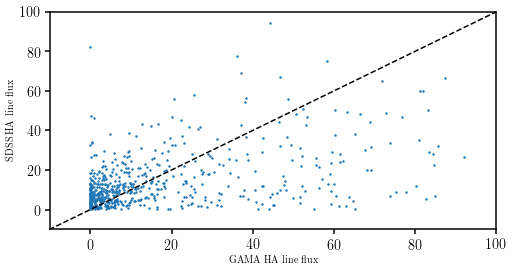

-0.70717907


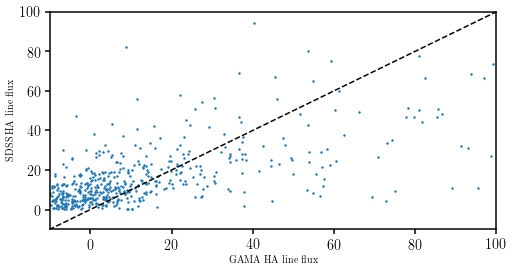

In [247]:
emlineComparison('ha')
emlineComparison('ha', integrated=True)

In [135]:
sdss_specs = [] 
for i_sdss in m_sdss[:10]:
    plate_i = f_sdss_emline['plate'].value[i_sdss,0]
    mjd_i = f_sdss_emline['mjd'].value[i_sdss,0]
    fiberid_i = f_sdss_emline['fiberid'].value[i_sdss,0]
    url_i = ''.join(['https://dr14.sdss.org/sas/dr14/eboss/spectro/redux/v5_10_0/spectra/lite/', 
                     str(plate_i), '/spec-', str(plate_i), '-', str(mjd_i), '-', str(fiberid_i).zfill(4), '.fits'])
    local_i = ''.join([UT.dat_dir(), 'gama/spectra/spec-', str(plate_i), '-', str(mjd_i), '-', str(fiberid_i).zfill(4), '.fits'])
    if not os.path.isfile(local_i): 
        subprocess.call(['curl', '-o', local_i, url_i]) 

    fspec_i = fits.open(local_i)
    sdss_specs.append(fspec_i[1].data)

In [249]:
def justEmLines(wave, gleg_index): 
    z_gama = gleg['gama-spec']['z_helio'][gleg_index]
    emlambda_red = (1.+z_gama)*np.array(emline_lambda)
    
    flux = np.zeros(len(wave))
    for i_k, k in enumerate(emline_gleg_key): 
        if (gleg['gama-spec'][k][gleg_index] == -99.) or (gleg['gama-spec'][k+'sig'][gleg_index] < 0.): 
            continue 
        print k, emlambda_red[i_k]
        lineflux = gleg['gama-spec'][k][gleg_index]
        linesig = gleg['gama-spec'][k+'sig'][gleg_index]
        A = lineflux / np.sqrt(2.*np.pi*linesig**2)
        emline_flux = A * np.exp(-0.5*(wave-emlambda_red[i_k])**2/linesig**2)
        flux += emline_flux
    return flux

In [252]:
def justEmLines_integrated(wave, gleg_index): 
    z_gama = gleg['gama-spec']['z_helio'][gleg_index]
    emlambda_red = (1.+z_gama)*np.array(emline_lambda)
    
    flux = np.zeros(len(wave))
    for i_k, k in enumerate(emline_gleg_key): 
        if 'i'+k not in gleg['gama-spec'].keys(): 
            continue
        if (gleg['gama-spec']['i'+k][gleg_index] == -99.) or (gleg['gama-spec'][k+'sig'][gleg_index] < 0.): 
            continue 
        print k, emlambda_red[i_k]
        lineflux = gleg['gama-spec']['i'+k][gleg_index]
        linesig = gleg['gama-spec'][k+'sig'][gleg_index]
        A = lineflux / np.sqrt(2.*np.pi*linesig**2)
        emline_flux = A * np.exp(-0.5*(wave-emlambda_red[i_k])**2/linesig**2)
        flux += emline_flux
    return flux

In [231]:
def justEmLines_SDSS(wave, gleg_index, sdss_index): 
    z_gama = gleg['gama-spec']['z_helio'][gleg_index]
    emlambda_red = (1.+z_gama)*np.array(emline_lambda)
    
    flux = np.zeros(len(wave))
    for i_k, k in enumerate(emline_gleg_key): 
        if (gleg['gama-spec'][k][gleg_index] == -99.) or (gleg['gama-spec'][k+'sig'][gleg_index] < 0.): 
            continue 
        #lineflux = gleg['gama-spec'][k][gleg_index]
        linesig = gleg['gama-spec'][k+'sig'][gleg_index]
        lineflux = sdss_linearea[sdss_index,emline_sdss_index[i_k]]
        
        
        A = lineflux / np.sqrt(2.*np.pi*linesig**2)
        emline_flux = A * np.exp(-0.5*(wave-emlambda_red[i_k])**2/linesig**2)
        flux += emline_flux
    return flux

==0==
-1.9581571564231126e-07 2.7173483407860743e-08
3815, 55537, 654
niib 8096.340081810951


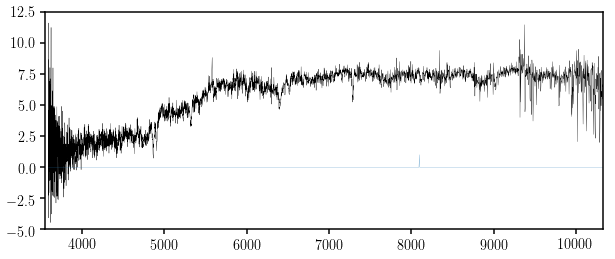

==1==
3.0848462984067737e-07 3.417501109881371e-08
4793, 55648, 12
oiib 4770.807629227638
oiir 4773.368449211121


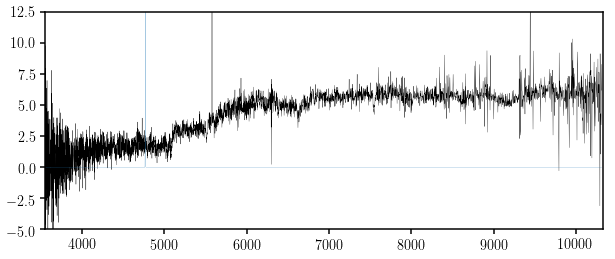

==2==
-3.402802519758552e-07 -2.9931191608545404e-07
3818, 55532, 146
oiib 4780.383461415768
oiir 4782.949421405792
oiiib 6362.297795265913
oiiir 6423.880835026503
niib 8400.953007340431
ha 8420.197707265615
niir 8447.140287160873
siib 8616.493646502495
siir 8635.738346427679


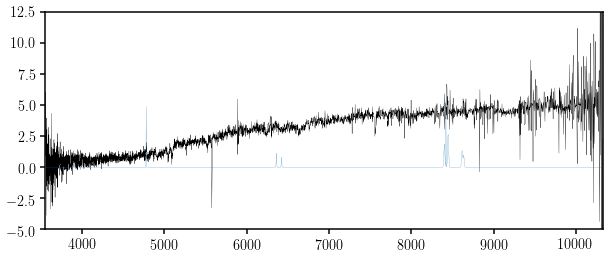

==3==
-1.8485019381841994e-07 5.035008501241833e-07
4021, 55620, 182
oiib 4873.607993781567
oiir 4876.223993778229
oiiir 6549.155991643667
niib 8564.783989071846
ha 8584.403989046812
niir 8611.871989011765
siib 8784.527988791466
siir 8804.147988766432


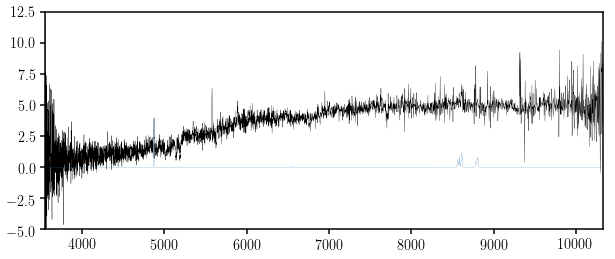

==4==
-6.039344100372546e-07 -6.723442069755947e-08
4729, 55626, 476
oiib 4008.319013044238
oiir 4010.4705530405045
niib 7044.141947776079
ha 7060.278497748077
niir 7082.869667708874
siib 7224.871307462454
siir 7241.007857434452


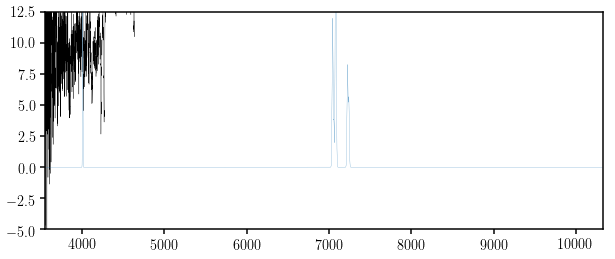

==5==
1.7277190522690944e-07 6.114924600009175e-07
4748, 55631, 458
ha 8526.452627569437
niir 8553.73519730568


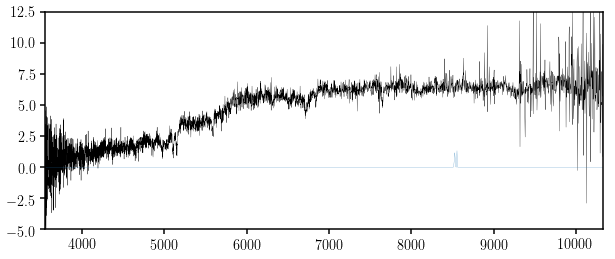

==6==
-7.155933303693018e-07 -4.3121094983611385e-07
4031, 55604, 408
oiib 4843.539203345776
oiir 4846.139063358307
oiiib 6446.35290107131
oiiir 6508.749541372061
niib 8511.941681027412
ha 8531.440631121397
niir 8558.739161252975
siib 8730.32992208004
siir 8749.828872174025


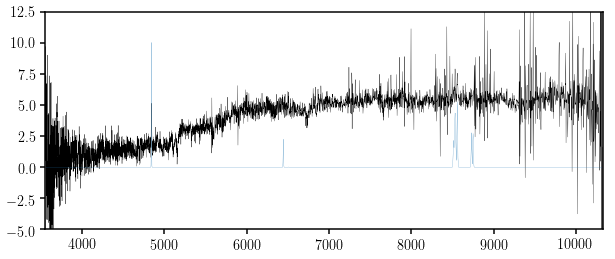

==7==
-7.775385597597051e-07 3.356765907458481e-07
4750, 55630, 312
oiir 4613.698245048523
oiiib 6137.159226715565
oiiir 6196.563066780567
niib 8103.673848867416
niir 8148.226728916168
siib 8311.587289094925
siir 8330.150989115238


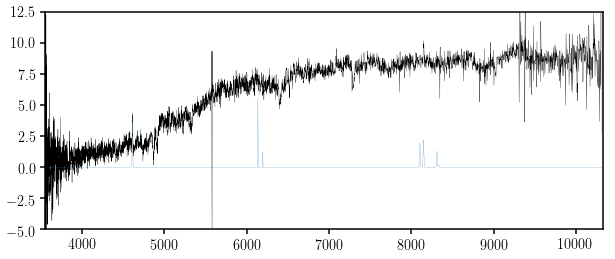

==8==
6.75941066674568e-07 5.619256711053566e-07
3777, 55210, 684
oiib 4466.430694788694
oiir 4468.828134775162
niib 7849.218515694141
niir 7892.372435450554
siir 8068.584274455905


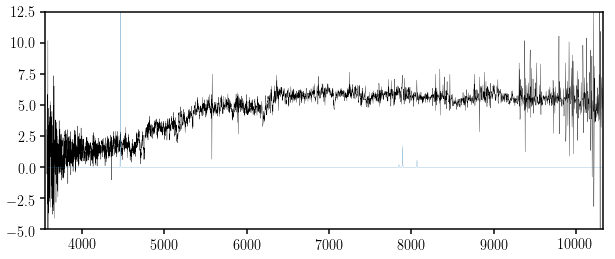

==9==
2.3618491695742705e-07 -8.827776154241018e-07
4025, 55350, 980
oiib 4506.708764791489
oiir 4509.127824783325
niib 7920.002413272858
ha 7938.145363211632
niir 7963.5454931259155
siib 8123.203452587128
siir 8141.346402525902


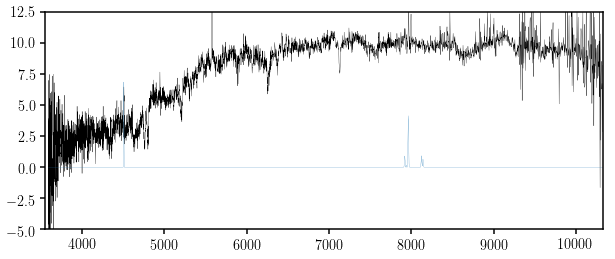

In [195]:
for i in range(10): 
    print('==%i==' % i)
    print ra_sdss[m_sdss[i]]-gleg['gama-photo']['ra'][m_gleg[i]], dec_sdss[m_sdss[i]]-gleg['gama-photo']['dec'][m_gleg[i]]
    print('%i, %i, %i' % (f_sdss_emline['plate'].value[m_sdss[i],0], f_sdss_emline['mjd'].value[m_sdss[i],0], f_sdss_emline['fiberid'].value[m_sdss[i],0]))
    fig = plt.figure(figsize=(10,4))
    sub = fig.add_subplot(111)
    sub.plot(10**sdss_specs[i]['loglam'], sdss_specs[i]['flux'], c='k', lw=0.3)
    sub.plot(10**sdss_specs[i]['loglam'], justEmLines(10**sdss_specs[i]['loglam'], m_gleg[i]), lw=0.2)
    sub.set_xlim([3550, 10325])
    sub.set_ylim([-5., 12.5])
    plt.show()

oiib 4873.607993781567
oiir 4876.223993778229
oiiir 6549.155991643667
niib 8564.783989071846
ha 8584.403989046812
niir 8611.871989011765
siib 8784.527988791466
siir 8804.147988766432
oiib 4873.607993781567
oiir 4876.223993778229
oiiir 6549.155991643667
niib 8564.783989071846
ha 8584.403989046812
niir 8611.871989011765
siib 8784.527988791466
siir 8804.147988766432
oiib 4873.607993781567
oiir 4876.223993778229
oiiir 6549.155991643667
niib 8564.783989071846
ha 8584.403989046812
niir 8611.871989011765
siib 8784.527988791466
siir 8804.147988766432
oiib 4873.607993781567
oiir 4876.223993778229
oiiir 6549.155991643667
niib 8564.783989071846
ha 8584.403989046812
niir 8611.871989011765
siib 8784.527988791466
siir 8804.147988766432


(-5.0, 12.5)

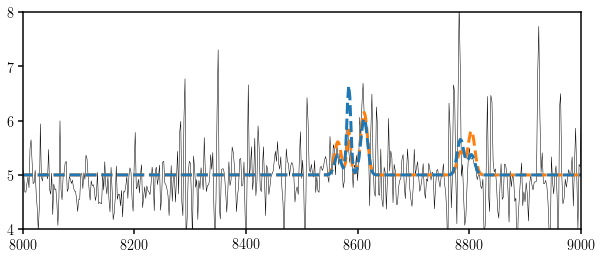

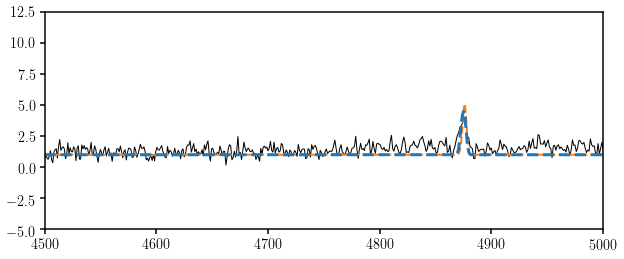

In [224]:
fig = plt.figure(figsize=(10,4))
sub = fig.add_subplot(111)
sub.plot(10**sdss_specs[3]['loglam'], sdss_specs[3]['flux'], c='k', lw=0.5)
sub.plot(10**sdss_specs[3]['loglam'], justEmLines(10**sdss_specs[3]['loglam'], m_gleg[3])+5., c='C1', ls='--', lw=3)
sub.plot(10**sdss_specs[3]['loglam'], justEmLines_SDSS(10**sdss_specs[3]['loglam'], m_gleg[3], m_sdss[3])+5., c='C0', ls='--', lw=3)
sub.set_xlim([8000, 9000])
sub.set_ylim([4, 8.])

fig = plt.figure(figsize=(10,4))
sub = fig.add_subplot(111)
sub.plot(10**sdss_specs[3]['loglam'], sdss_specs[3]['flux'], c='k', lw=1)
sub.plot(10**sdss_specs[3]['loglam'], justEmLines(10**sdss_specs[3]['loglam'], m_gleg[3])+1., c='C1', lw=2, ls='--')
sub.plot(10**sdss_specs[3]['loglam'], justEmLines_SDSS(10**sdss_specs[3]['loglam'], m_gleg[3], m_sdss[3])+1., c='C0', ls='--', lw=3)

sub.set_xlim([4500, 5000])
sub.set_ylim([-5., 12.5])

oiib 4780.383461415768
oiir 4782.949421405792
oiiib 6362.297795265913
oiiir 6423.880835026503
niib 8400.953007340431
ha 8420.197707265615
niir 8447.140287160873
siib 8616.493646502495
siir 8635.738346427679
oiib 4780.383461415768
oiir 4782.949421405792
oiiib 6362.297795265913
oiiir 6423.880835026503
niib 8400.953007340431
ha 8420.197707265615
niir 8447.140287160873
siib 8616.493646502495
siir 8635.738346427679


(0.0, 7.0)

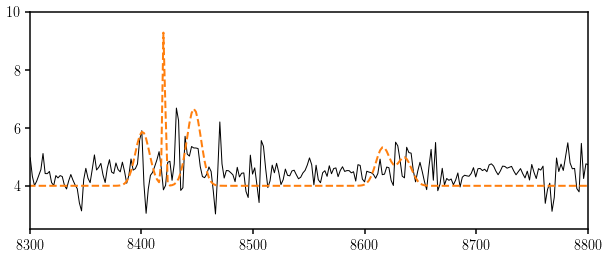

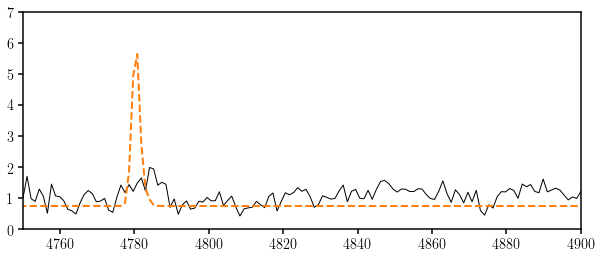

In [207]:
fig = plt.figure(figsize=(10,4))
sub = fig.add_subplot(111)
sub.plot(10**sdss_specs[2]['loglam'], sdss_specs[2]['flux'], c='k', lw=1)
sub.plot(10**sdss_specs[2]['loglam'], justEmLines(10**sdss_specs[2]['loglam'], m_gleg[2])+4., c='C1', ls='--', lw=2)
sub.set_xlim([8300, 8800])
sub.set_ylim([2.5, 10.])

fig = plt.figure(figsize=(10,4))
sub = fig.add_subplot(111)
sub.plot(10**sdss_specs[2]['loglam'], sdss_specs[2]['flux'], c='k', lw=1)
sub.plot(10**sdss_specs[2]['loglam'], justEmLines(10**sdss_specs[2]['loglam'], m_gleg[2])+0.75, c='C1', ls='--', lw=2)
sub.set_xlim([4750, 4900])
sub.set_ylim([0., 7.])

oiib 4008.319013044238
oiir 4010.4705530405045
niib 7044.141947776079
ha 7060.278497748077
niir 7082.869667708874
siib 7224.871307462454
siir 7241.007857434452
oiib 4008.319013044238
oiir 4010.4705530405045
niib 7044.141947776079
ha 7060.278497748077
niir 7082.869667708874
siib 7224.871307462454
siir 7241.007857434452


(5, 30.0)

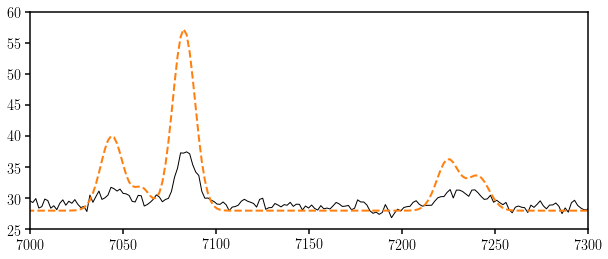

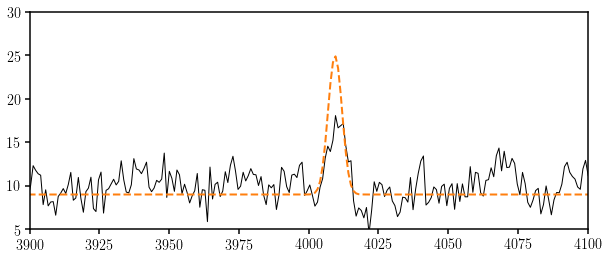

In [208]:
fig = plt.figure(figsize=(10,4))
sub = fig.add_subplot(111)
sub.plot(10**sdss_specs[4]['loglam'], sdss_specs[4]['flux'], c='k', lw=1)
sub.plot(10**sdss_specs[4]['loglam'], justEmLines(10**sdss_specs[4]['loglam'], m_gleg[4])+28, c='C1', ls='--', lw=2)
sub.set_xlim([7000, 7300])
sub.set_ylim([25, 60.])

fig = plt.figure(figsize=(10,4))
sub = fig.add_subplot(111)
sub.plot(10**sdss_specs[4]['loglam'], sdss_specs[4]['flux'], c='k', lw=1)
sub.plot(10**sdss_specs[4]['loglam'], justEmLines(10**sdss_specs[4]['loglam'], m_gleg[4])+9, c='C1', ls='--', lw=2)
sub.set_xlim([3900, 4100])
sub.set_ylim([5, 30.])

oiir 4613.698245048523
oiiib 6137.159226715565
oiiir 6196.563066780567
niib 8103.673848867416
niir 8148.226728916168
siib 8311.587289094925
siir 8330.150989115238
oiiib 6137.159226715565
oiiir 6196.563066780567
niib 8103.673848867416
niir 8148.226728916168
siib 8311.587289094925
siir 8330.150989115238


(0, 5.0)

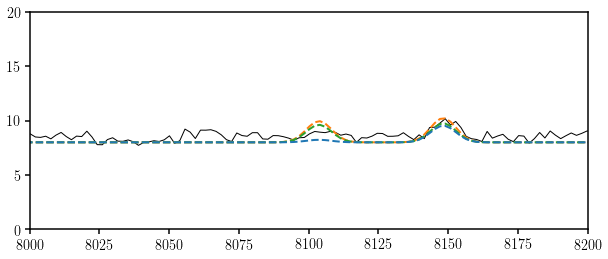

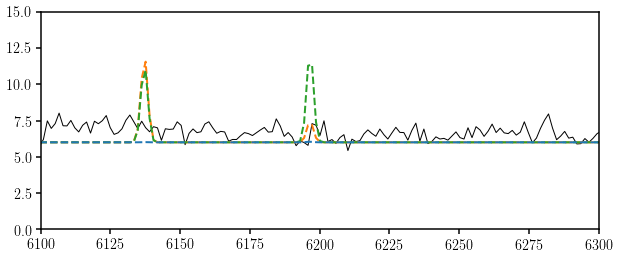

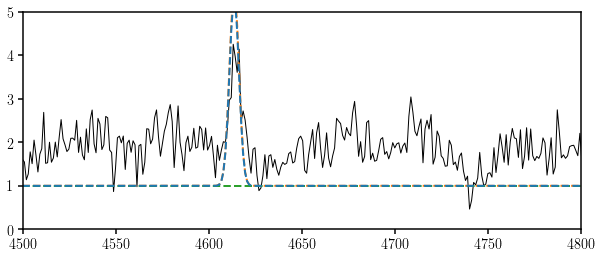

In [255]:
ii = 7 
ww = 10**sdss_specs[ii]['loglam']
jel = justEmLines(ww, m_gleg[ii])
jelint = justEmLines_integrated(ww, m_gleg[ii])
jelsdss = justEmLines_SDSS(ww, m_gleg[ii], m_sdss[ii])
fig = plt.figure(figsize=(10,4))
sub = fig.add_subplot(111)
sub.plot(ww, sdss_specs[ii]['flux'], c='k', lw=1)
sub.plot(ww, jel+8, c='C1', ls='--', lw=2)
sub.plot(ww, jelint+8, c='C2', ls='--', lw=2)
sub.plot(ww, jelsdss+8, c='C0', ls='--', lw=2)
sub.set_xlim([8000, 8200])
sub.set_ylim([0., 20.])

fig = plt.figure(figsize=(10,4))
sub = fig.add_subplot(111)
sub.plot(ww, sdss_specs[ii]['flux'], c='k', lw=1)
sub.plot(ww, jel+6, c='C1', ls='--', lw=2)
sub.plot(ww, jelint+6, c='C2', ls='--', lw=2)
sub.plot(ww, jelsdss+6, c='C0', ls='--', lw=2)
sub.set_xlim([6100, 6300])
sub.set_ylim([0, 15.])

fig = plt.figure(figsize=(10,4))
sub = fig.add_subplot(111)
sub.plot(ww, sdss_specs[ii]['flux'], c='k', lw=1)
sub.plot(ww, jel+1, c='C1', ls='--', lw=2)
sub.plot(ww, jelint+1, c='C2', ls='--', lw=2)
sub.plot(ww, jelsdss+1, c='C0', ls='--', lw=2)
sub.set_xlim([4500, 4800])
sub.set_ylim([0, 5.])

oiib 4506.708764791489
oiir 4509.127824783325
niib 7920.002413272858
ha 7938.145363211632
niir 7963.5454931259155
siib 8123.203452587128
siir 8141.346402525902
niib 7920.002413272858
ha 7938.145363211632
niir 7963.5454931259155
siib 8123.203452587128
siir 8141.346402525902


(0, 15.0)

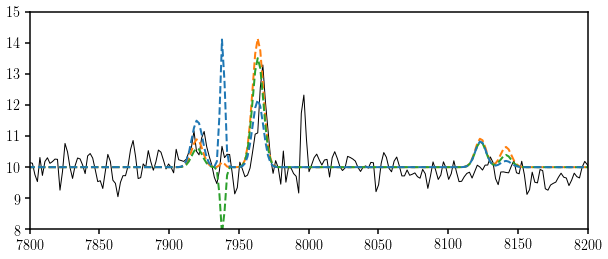

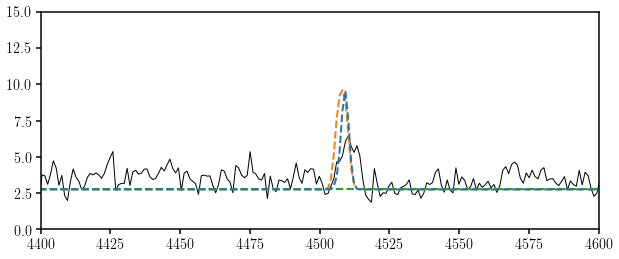

In [253]:
ii = 9
ww = 10**sdss_specs[ii]['loglam']
jel = justEmLines(ww, m_gleg[ii])
jelint = justEmLines_integrated(ww, m_gleg[ii])
jelsdss = justEmLines_SDSS(ww, m_gleg[ii], m_sdss[ii])
fig = plt.figure(figsize=(10,4))
sub = fig.add_subplot(111)
sub.plot(ww, sdss_specs[ii]['flux'], c='k', lw=1)
sub.plot(ww, jel+10, c='C1', ls='--', lw=2)
sub.plot(ww, jelint+10, c='C2', ls='--', lw=2)
sub.plot(ww, jelsdss+10, c='C0', ls='--', lw=2)
sub.set_xlim([7800, 8200])
sub.set_ylim([8., 15.])

fig = plt.figure(figsize=(10,4))
sub = fig.add_subplot(111)
sub.plot(ww, sdss_specs[ii]['flux'], c='k', lw=1)
sub.plot(ww, jel+2.75, c='C1', ls='--', lw=2)
sub.plot(ww, jelint+2.75, c='C2', ls='--', lw=2)
sub.plot(ww, jelsdss+2.75, c='C0', ls='--', lw=2)
sub.set_xlim([4400, 4600])
sub.set_ylim([0, 15.])